#**Principal Component Analysis ( PCA ) :**


**FILE UPLOAD :**

In [1]:
from google.colab import files
file_uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [6]:
Data = pd.read_csv("/content/Mall_Customers.csv")

**DATA TO DATA CONVERT :**

In [8]:
df=Data
df         # Kmean + PCA

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
x = df[["Annual Income (k$)","Spending Score (1-100)"]]

**PIPE LINE :**

In [16]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("PCA", PCA(n_components=2)),
        ("Kmeans", KMeans(n_clusters=5, random_state=42))
    ]
)

In [17]:
pipe.fit(x)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('Kmeans', KMeans(n_clusters=5, random_state=42))])

In [18]:
labels = pipe["Kmeans"].labels_

df["Cluster"]=labels

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


**TRANSFORM PIPE :**

In [15]:
X_PCA = pipe["PCA"].transform(pipe["scaler"].transform(x))

**SCATTER PLOT :**

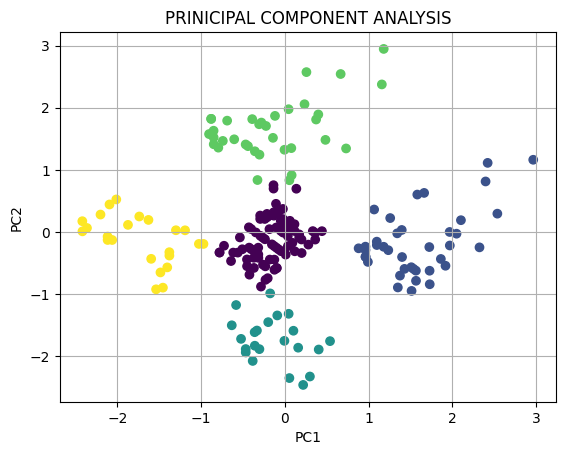

In [21]:
plt.scatter(X_PCA[:,0],X_PCA[:,1],c=labels)
plt.title("PRINICIPAL COMPONENT ANALYSIS")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()